<a href="https://colab.research.google.com/github/gcorani/bda/blob/main/nbooks/2_ProbProgramming_normal_normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
21q wsdefghjm,          ` pymc as pm
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from scipy.stats import t
from scipy.stats import norm
import seaborn as sns
from IPython.display import display, Markdown
az.style.use('arviz-darkgrid')
np.random.seed(44)


In [ ]:
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams.update({
    'figure.figsize': [7,3],
    'figure.constrained_layout.use': True,
    'font.size': 14.0,
    'hist.bins': 'auto',
    'lines.linewidth': 3.0,
    'lines.markeredgewidth': 2.0,
    'lines.markerfacecolor': 'none',
    'lines.markersize': 8.0,
})
sns.set(rc={'figure.figsize':(7,3)})

# Normal-normal models  in probabilistic programming


Giorgio Corani <br/>
*Bayesian Data Analysis and Probabilistic Programming*
<br/>
<br/>
``giorgio.corani@supsi.ch``





# Based on..


*   Chapter 2 of O. Martin, *Bayesian Analysis with Python, Second Edition*.

*  Notebook by G. Corani

# Normal - normal model


\begin{align*}
\mu & \sim N(\mu', \sigma_{\mu})  && \text{prior uncertainty on } \mu\\
\sigma & \sim \text{HalfNormal} (\xi) &&  \text{prior uncertainty on } \sigma\\
\vec{y} & \sim N(\mu, \sigma) && \text{distribution of the data given } \mu \text{ and } \sigma \\
\end{align*}

* The observations $\vec{y}=\{y_1,y_2,y_n\}$ are assumed to be independent.


# Inference about the speed of light

* At the end of the 19th century  Newcomb carried out several experiments to determine the speed of light.

* He measured 66 times how much time it took for the light to travel a certain distance.

* The reported data are the time in millionths of a second for light to traverse a known distance.

* Based on  theory,  he expected the travel time to be within (246,  250).
We formalize this with the prior $\mu \sim N(248,1)$.

* He estimates his measuring tools to yield to have a precision of +- 0.2.
We formalize this by choosing the scale of the NH so that the median is about 0.2.
     

In [ ]:
#Below  the  66 measurements.

data = np.array([248.28, 248.26, 248.33, 248.24, 248.34, 247.56, 248.27, 248.16,
                  248.4, 247.98, 248.29, 248.22, 248.24, 248.21, 248.25, 248.3,
                  248.23, 248.29, 248.31, 248.19, 248.24, 248.2, 248.36, 248.32,
                  248.36, 248.28, 248.25, 248.21, 248.28, 248.29, 248.37, 248.25,
                  248.28, 248.26, 248.3, 248.32, 248.36, 248.26, 248.3, 248.22,
                  248.36, 248.23, 248.27, 248.27, 248.28, 248.27, 248.31, 248.27,
                  248.26, 248.33, 248.26, 248.32, 248.32, 248.24, 248.39, 248.28,
                  248.24, 248.25, 248.32, 248.25, 248.29, 248.27, 248.28, 248.29,
                  248.16, 248.23])

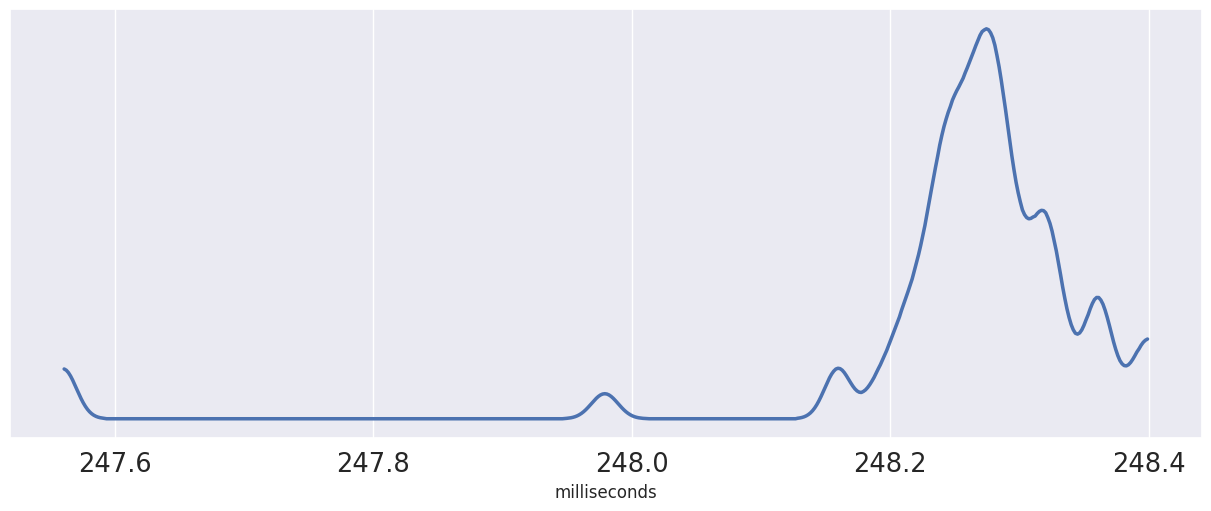

In [ ]:
# The data are almost  normally distributed, apart from some  low-values outliers  which are far from the mean.
#the density plot is called kde (kernel density estimation)
az.plot_kde(data, figsize=[12,5])
plt.yticks([])
plt.xlabel('milliseconds');

In [ ]:
#tune the halfnormal prior to have a median close to 0.2, the plausible value of sigma a priori.
from scipy.stats import halfnorm

#scale of the half-normal obtained after some trial and error
halfnorm.median(scale=0.3) #0.2

np.float64(0.2023469250588245)

In [71]:
with pm.Model() as normal_model:
    # The prior information from the theory is represented by a N(248, 1).
    mu = pm.Normal('mu', 248, 1)

    # By using a  scale parameter of 3, the median  of the halfnormal is close to 2.,
    sigma = pm.HalfNormal('sigma', 0.3)


    #likelihood. The observation are stored in vector 'data'.
    #and assumed to be independent.
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data)

    normal_trace = pm.sample()

Output()

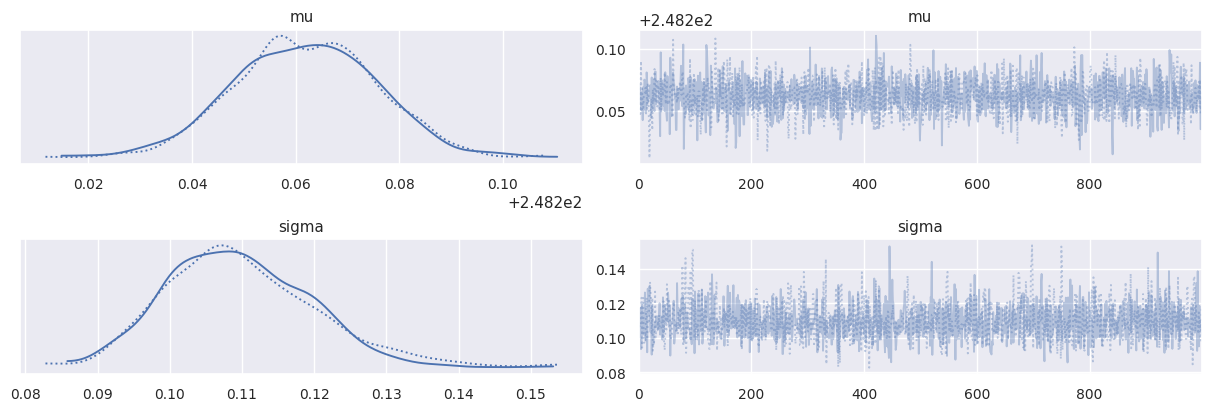

In [ ]:
# The  density plots of  both parameters are smooth and the chains are well-mixing.

with  normal_model:
    az.plot_trace(trace_normal)

In [ ]:
# The  density plots of  both parameters are smooth and the chains are well-mixing.

with  normal_model:
    az.summary(trace_normal)

# Prior sensitivity

* We now test with a different prior, assuming the travel time to be within (200, 300). Recall that before we had instead a more informative prior, referring to the interval (246,  250).

* We refer to this as a *weakly informative* prior.

* The prior on sigma is not changed.


In [ ]:
with pm.Model() as model_weak_prior:

    mu = pm.Normal('mu', 250, 25)

    #identical to the previous model
    sigma = pm.HalfNormal('sigma', 0.3)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data)

    trace_weak_prior = pm.sample(return_inferencedata=True)

Output()

In [ ]:
# The posterior is practically identical under the two different priors.
# This is  good: the data are strong enough to converge to the same posterior.
# The likelihood overwhelms the prior; the results are thus robust to the specification of the prior.
pd.concat( [az.summary(trace_normal), az.summary(trace_weak_prior)] )

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,248.262,0.014,248.236,248.287,0.0,0.0,2220.0,1548.0,1.0
sigma,0.110,0.010,0.090,0.127,0.0,0.0,2218.0,1278.0,1.0
mu,248.262,0.014,248.235,248.287,0.0,0.0,1552.0,1232.0,1.0
sigma,0.110,0.010,0.092,0.128,0.0,0.0,1723.0,1492.0,1.0


# Predictions

# Point prediction

* How to make a prediction about the next measurement $y^{\text{new}}$?


* The simplest answer is to use the posterior mean (248.262, see previous slide). Recall that the posterior mean is compromise between the prior mean and the sample mean. However this is a **point prediction** without quantification of the uncertainty.


#  Predictive distribution

To model the uncertainty, we compute a distribution (*predictive distribution*) for the next observation. We denote the next observation by $y^{\text{new}}$.

The predictive distribution accounts for

*  the *epistemic* uncertainty about $\mu$ and  $\sigma$, i.e., the fact that we are unsure about the actual value of them;

* the *aleatory* uncertainty, i.e., the randomness which we would have sampling from a normal distribution, even if  know exactly $\mu$ and $\sigma$.

# Computing the predictive distribution

* The trace contains e.g. 4000  samples, i.e., 4000 values of $\mu$ and $\sigma$ from the posterior.

* We denote the $s$-th  sample  $<\mu_s, \sigma_s >$ (a sample contains a value for each parameter)


# Computing the predictive distribution

* We compute a  prediction from  each  sample:

$$
\left[
\begin{array}{ll}
\mu_1 &   \sigma_1 \\
\mu_2 & \sigma_2 \\
\vdots & \vdots  \\
\mu_{4000}  & \sigma_{4000} \\
\end{array}
\right]
\;\; \longrightarrow \;\;
\left[
\begin{array}{l}
y^{\text{new}}_{1} \\
y^{\text{new}}_{2} \\
\vdots \\
y^{\text{new}}_{4000} \\
\end{array}
\right]
$$

where  $y^{\text{new}}_{s}$ is sampled as:

$$y^{\text{new}}_{s} \; \sim \; N\left(\mu_s, \sigma_s\right)$$


* The  set of 4,000 values of $y_{\text{new}}$ is the *predictive* distribution of a new measurement.

# Computing the predictive distribution

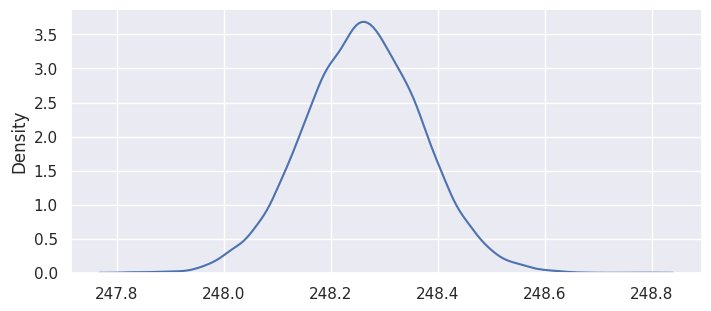

In [ ]:
#extract samples from the trace, merging samples from the different chains
post_samples = az.extract(trace_normal.posterior)

#vector of samples of each parameter
mu_post = post_samples.mu.values
sigma_post = post_samples.sigma.values

#vector containing the predictions.
y_new = np.zeros(len(mu_post))

#extract the posterior samples of mu and sigma
post_samples = az.extract(trace_normal.posterior)
mu_post      = post_samples.mu.values
sigma_post   = post_samples.sigma.values

# we draw five values for each pair of mu and sigma values.
# This provides  a smoother predictive distribution.
s = 5 #number of y_new sampled  for each element of the trace.
y_new = np.zeros( len(mu_post) * s)

#we should use together  the values of sigma e mu referring to the same sample
for i in range(len(mu_post)):
        y_new[i*s : (i+1) * s] = np.random.normal (loc = mu_post[i], scale = sigma_post[i], size=s)


mean: 248.261
hdi: [248.044 , 248.476 ]


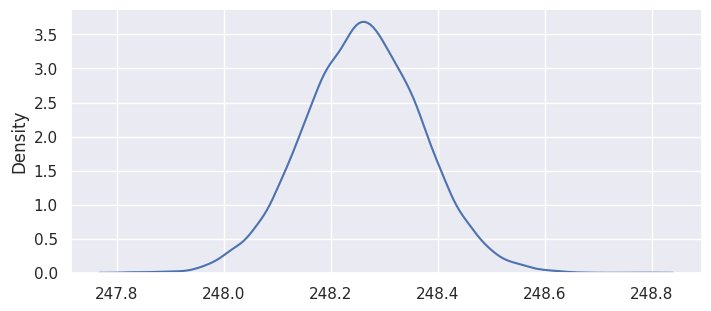

In [ ]:
# plot and summarize the predictive distribution
sns.kdeplot(y_new)

# since the distribution is symmetric, the 95% HDI is obtained by taking the 2.5 and 97.5 quantile
hdi = [np.quantile(y_new, 0.025), np.quantile(y_new, 0.975)]
pred_mean = np.mean(y_new)
print("mean: " + str(round(pred_mean,3)))
print("hdi: [" + str(round(hdi[0],3)) + " , " + str(round(hdi[1],3)) + " ]")

In [ ]:
# posterior samples are stored as xarray, which supports labelling of multidimensional arrays.
post_samples

<xarray.Dataset> Size: 80kB
Dimensions:  (sample: 2000)
Coordinates:
  * sample   (sample) object 16kB MultiIndex
  * chain    (sample) int64 16kB 0 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1 1
  * draw     (sample) int64 16kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
Data variables:
    mu       (sample) float64 16kB 248.3 248.3 248.3 248.3 ... 248.2 248.3 248.3
    sigma    (sample) float64 16kB 0.1136 0.1005 0.1102 ... 0.09838 0.1181
Attributes:
    created_at:                 2025-11-08T18:32:54.953615+00:00
    arviz_version:              0.22.0
    inference_library:          pymc
    inference_library_version:  5.26.1
    sampling_time:              1.355703592300415
    tuning_steps:               1000

In [ ]:
# The posterior prediction can be computed conveniently also within pymc.
# However implementing the loop on the posterior samples helps understanding

with pm.Model() as normal_model_with_pred:
    #model as before
    mu = pm.Normal('mu', 240, 80)
    sigma = pm.HalfNormal('sigma', 3)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data)

    #prediction of a new value
    y_new = pm.Normal('y_new', mu=mu, sigma=sigma)

    trace_normal_with_pred = pm.sample(return_inferencedata=True)

Output()

In [ ]:
# using 'var_names'  we can select the variables shown in the summary
# the mean and the extremes of the HDI are very close to what we computed before in the for loop.
# Small differences are due to the randomness of the sampling.
# The sampling error for the mean parameter is estimated by mcse_mean (standard error of the mean).
# Different repetition of the sampling will overall span a region of about +-3 mcse_mean around the actual value.
# We can expect different repetitions to possibily lie within a range of 6 mcse_mean.=-0
# Even 6 mcse_mean are a few orders of magnited lower than the estimated mean, hence our estimate is solid.
az.summary(trace_normal_with_pred, var_names='y_new', hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
y_new,248.262,0.113,248.039,248.473,0.002,0.002,2988.0,1720.0,1.0


# Your turn: predictive distribution for a beta-binomial model.


* Consider the prior $\theta \sim Beta(5,5)$
* Observations: 10 successes in 15 trials

* Which is the posterior distribution of $\theta$? (use the standard beta-binomial model)

* Compute the predictive distribution for the number of successes on the futUre 20 trials.

* Analyze the mean and the 95% HDI and draw your conclusions.


# Posterior predictive checks


*  Even if the sampling has converged correctly, the model might be inadequate.

* The most fundamental way to check model fit is to simulate virtual datasets and compare them to the actual data.

* As already seen, Bayesian models are able to generate artificial data.

# Posterior predictive checks


*  The original data set contains 66 observations.

*  For each parameter sample of the trace we simulate a data sets of size 66.

*  We then visually check the distribution of each simulated data set vs the distribution of the observations.

# Posterior predictive checks

* The  `sample_posterior_predictive` automates the whole procedure.

* The returned ppc object contains 4000 data sets of size 66 (same size of the actual data set).



In [60]:
with normal_model:
    # The returned ppc variable is a dictionary.
    # It contains  a data set as large as the original one (66) for each parameter sample <mu,sigma> in the trace
    ppc = pm.sample_posterior_predictive(trace_normal, model=normal_model)

Output()

In [61]:
ppc

Inference data with groups:
	> posterior_predictive
	> observed_data

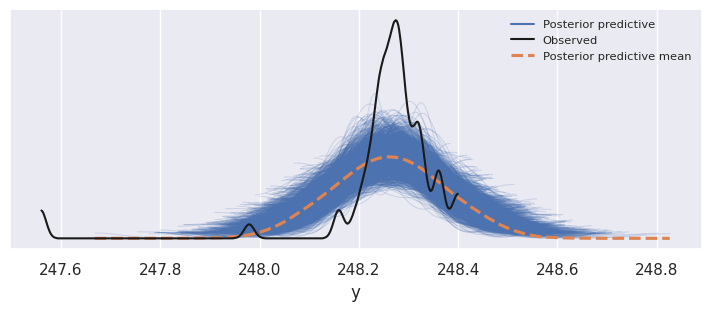

In [63]:
# plot_ppc shows the overlay of density estimates of the actual data set (solid) and the simulated data sets.
# The average of the simulated densities is also shown.
# The simulated datasets have too low densities in the center.
# The variance of the normal normal model is too large, and the model provides a poor fit.
# The variance is inflated by outliers. Indeed, the normal model and the normal distribution
# in general is not robust when dealing with outliers.
az.plot_ppc(ppc);

#  Robust models

* Outliers are observations which are  far from the mean  and isolated from the other ones.

* These points could be due to experimental errors. If we are sure that this is the case,  we could remove them from our dataset. However, this is arbitrary; we cannot validate the criterion used to detect outliers.

* A more rigorous approach is to adopt a likelihood which allows a little but non negligible probability to observations which are far from the mean. We call this a    *robust* model.

* The Student-$t$ distribution is the robust counterpart of the normal distribution.


#  The normal distribution has light tails

* The normal distribution is  sensitive to outliers, since
the probability of finding a value is practically 0 when we are more than 3 $\sigma$ far from the mean.


* If the data set contains observations very far from the mean, the normal model should inflate much the variance to include them within the $\mu \pm 3 \sigma$ interval.



# Student's t distribution

<div style="text-align: center;">
 <img src='https://drive.google.com/uc?export=view&id=1ufQncebIiWZa4Jio61pEW57DzUZpi1Zo' width='400'>
</div>


* Besides mean $\mu$ and  scale $\sigma$, it is characterized and by $\nu$ ( *degrees of freedom*  or as *normality* coefficient).

*  $\nu$ controls how _heavy_ the tails of the distribution are.

    *  $\nu > 30$: the Student is practically equivalent to a Gaussian.

    * for $\nu < 10$ the distribution is referred to as *heavy tailed*: it can model outliers;

    * $\nu = 4$ is a common choice for robust models, as an alternative to the normal model.

    * The Student pdf decays as a polynomial function of the squared distance from the center, while the normal decreases exponentially.

# Comparing the normal and the Student-t distribution


* The Student distribution with low (4- 10) degrees of freedom has long tails. For $\nu$ close to 30 or above, it becomes similar to a Gaussian.


|  |  Student ($\nu$=4) | Student ($\nu$=10) | Student ($\nu$=30) | N(0,1) |
|:-:| :-: | :-: | :-: | :-: |    
| qtile .975 | 2.8 | 2.2 | 2.1 | 1.96 |
| qtile .995 | 4.6 | 3.2 | 2.7 | 2.6 |

# Comparing the normal and the Student-t distribution


* To match the high quantiles (.975, .995) of the Student($\nu$=4) with a Gaussian we need to increase much its standard deviation. However this way the normal distribution becomes very spread and low around the mean.


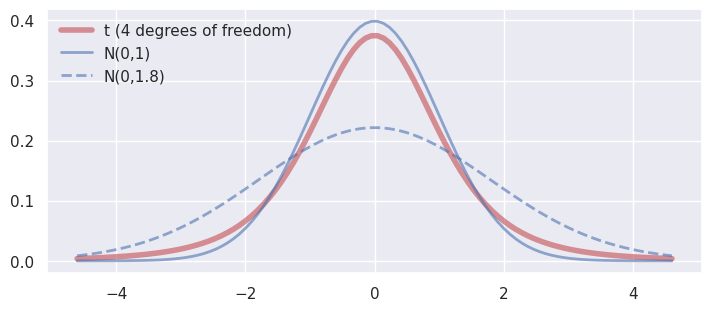

In [65]:
from scipy.stats import t
x = np.linspace(t.ppf(0.005, 4),
                t.ppf(0.995, 4), 100)
plt.plot(x, t.pdf(x, 4),
       'r-', lw=4, alpha=0.6, label='t (4 degrees of freedom)')
plt.plot(x, norm.pdf(x),
       'b-', lw=2, alpha=0.6, label='N(0,1)')
plt.plot(x, norm.pdf(x, scale = 1.8),
       'b--', lw=2, alpha=0.6, label='N(0,1.8)')
plt.legend(loc="upper left")

# Robust  model

\begin{align*}
\mu &\sim N(\mu', \sigma_{\mu}) && \text{prior on  } \mu\\
\sigma &\sim \text{Half-Normal}(\xi) && \text{prior on } \sigma \\
y & \sim StudentT (\mu, \sigma, \nu=4) && \text{robust model of the observations}
\end{align*}

In [70]:
with pm.Model() as robust_model:
    #the priors are the same as those of  the first variant
    mu_t    = pm.Normal('mu_t', 240, 80)
    sigma_t = pm.HalfNormal('sigma_t', sigma=3)

    #robust likelihood
    y       = pm.StudentT('y', mu=mu_t, sigma=sigma_t, nu=4, observed=data)

    #prediction for a new measurement
    #prediction = pm.StudentT('prediction', mu=mu_t, sd=sigma_t, nu=4)

    robust_trace = pm.sample(return_inferencedata=True)

Output()

In [72]:
# The estimate of mu is  identical between the model with normal and t likelihood,
# but the model with t likelihood has much lower sigma than the normal model.
# The t- distribution does not need inflating the  variance in order to cover the outliers.
# This allows keeping higher the density around the bulk of the data, as it will be shown by the posterior predictive check.


with robust_model:
    summary_t = az.summary(robust_trace)
with normal_model:
    summary= az.summary(normal_trace)
pd.concat([summary, summary_t])[ ["mean","sd" ]]

,mean,sd
mu,248.262,0.014
sigma,0.109,0.010
mu_t,248.275,0.006
sigma_t,0.047,0.006


Output()

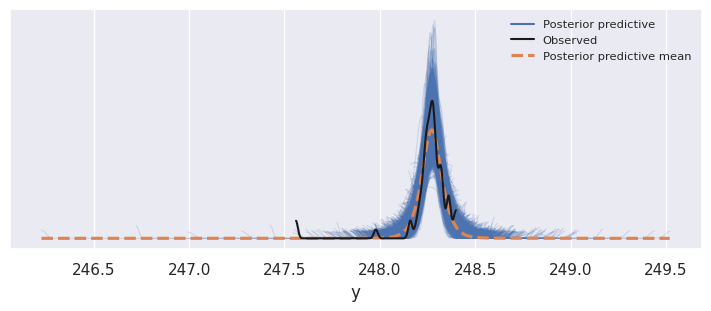

In [73]:
with robust_model:
    ppc_t = pm.sample_posterior_predictive(robust_trace, model=robust_model)
az.plot_ppc(ppc_t);

# Your turn - 1

* compare the predictive distribution for the next value $y^{new}$,  using the normal and the robust likelihood


* hint: use the function `t.rvs` to sample from a Student-t distribution with 4  degrees of freedom.

## Your turn - 2

* Implement a code which perform posterior predictive check for the normal and the robust model.

* Randomly choose 15 parameter samples. For each sample a plot comparing the density of the simulated data and the actual data.

## Your turn - 3


* Using the speed of light data, calculate the mean and standard deviation with and without the _outliers_, compare those values ​​with those obtained with the gaussian and the robust model.


* Hint: consider outliers the observations which are more distant than 3.5 standard deviations from the mean.


* Is it beneficial to adopt a robust likelihood to analyze the data?

# Solutions

## Predictive distribution from the beta-binomial model

In [49]:
from scipy.stats import beta
from scipy.stats import binom


# posterior samples of theta, representing epistemic uncertainty
theta_post = beta.rvs (a=15, b=20, size=2000)
s = 5 # five draws for each sample of theta
n = 20 # future trials

y_new = np.zeros( len(theta_post) * s)

#this sampling represent the aleatory uncertainty
# each drawn value of y_new is an integer, comprised between 0 and 20 (the number of future trials)
for i, t in enumerate(theta_post):
        y_new[i*s : (i+1) * s] = binom.rvs(n=n, p=t, size=s)

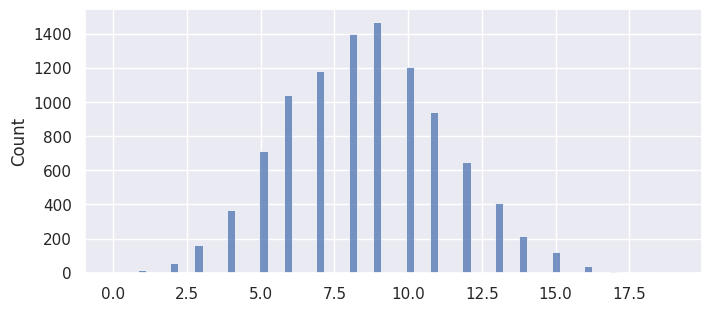

In [51]:
# plotting the predictive distribution
# we plot using an histogram, since the distribution is discrete.
# since the distribution is symmetric, we compute the HDI by taking the 2.5 and 97.5 quantile.
sns.histplot(y_new);

In [53]:
# Summary of the predictive distribution
# The most plausible outcome is 9 successes in the next 20 trials, but the 95% HDI
# shows a major uncertainty, going from 4 to 14.
pd.DataFrame( y_new ).describe( percentiles=[0.025, 0.975] )

,0
count,10000.000000
mean,8.573400
std,2.726712
min,0.000000
2.5%,4.000000
50%,9.000000
97.5%,14.000000
max,19.000000


In [ ]:
# predictive distribution with the Student likelihood
from scipy.stats import t

#the  samples have been already extracted  in the previous cell
post_samples_t = az.extract(trace_t.posterior)
mu_post_t = post_samples_t.mu_t.values
sigma_post_t = post_samples_t.sigma_t.values

#your code: compute a probabilistic prediction for the next observation
s = 5 #number of y_new sampled  for each element of the trace.
y_new_t = np.zeros( len(mu_post) * s)

#we should use together  the values of sigma e mu referrring to the same sample
for i, current_mu in enumerate(mu_post):
        y_new_t[i*s : (i+1) * s] = t.rvs (loc = mu_post_t[i], scale = sigma_post_t[i], df=4, size=s)

pd.DataFrame(y_new_t).describe(percentiles=[0.025, 0.975])

,0
count,10000.000000
mean,248.275282
std,0.066581
min,247.698692
2.5%,248.142119
50%,248.275362
97.5%,248.410270
max,248.947335


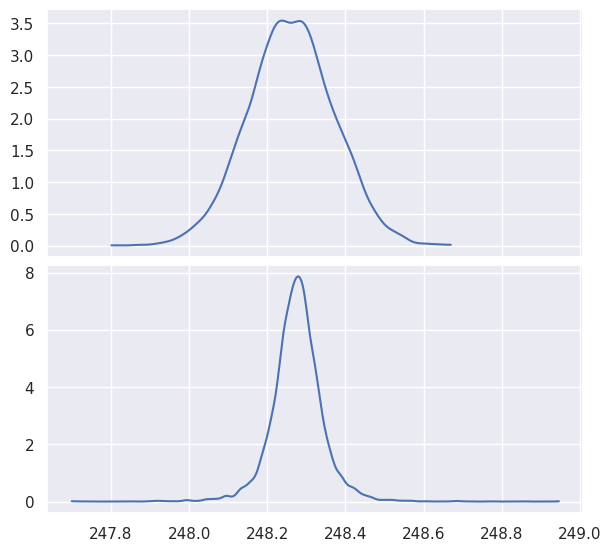

In [ ]:
#here we visually compare the predictive distribution of the model with Gaussian and  Studend likelihood.
#the t distribution has higher density around the mean; at the same time it has  longer tails.

#to make the visual comparison,  we set up two plots with a shared x-axis
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6, 5.4), sharex=True)
plt.subplot(2,1,1)
az.plot_kde(y_new);
plt.subplot(2,1,2)
az.plot_kde(y_new_t);

# Fitting the model with Gaussian likelihood after removing outliers


In [ ]:
#Below  the  66 measurements.

data = np.array([248.28, 248.26, 248.33, 248.24, 248.34, 247.56, 248.27, 248.16,
                  248.4, 247.98, 248.29, 248.22, 248.24, 248.21, 248.25, 248.3,
                  248.23, 248.29, 248.31, 248.19, 248.24, 248.2, 248.36, 248.32,
                  248.36, 248.28, 248.25, 248.21, 248.28, 248.29, 248.37, 248.25,
                  248.28, 248.26, 248.3, 248.32, 248.36, 248.26, 248.3, 248.22,
                  248.36, 248.23, 248.27, 248.27, 248.28, 248.27, 248.31, 248.27,
                  248.26, 248.33, 248.26, 248.32, 248.32, 248.24, 248.39, 248.28,
                  248.24, 248.25, 248.32, 248.25, 248.29, 248.27, 248.28, 248.29,
                  248.16, 248.23])

xbar= np.mean(data)
s = np.std(data)

#the criterion for detecting outliers is a heuristic one.
#here we consider as outliers observations which are more than 3.5 std far from the mean.

# we remove observations lower than xbar - 3.5 sigma
data2 = data [data > xbar - 3.5 * s]

# we remove observations larger than xbar +3.5 sigma
data2 = data2 [data2 < xbar + 3.5 * s]

#one observation has been removed
print(len(data))
print(len(data2))

66
65


In [ ]:
with pm.Model() as normal_model_no_outliers:
    #prior for the location of mu
    # Based on prior information,  mu should lie within the interval (120,  360).
    # This corresponds to a normal distribution with mu = 240, sigma = 60
    mu = pm.Normal('mu', 240, 60)

    #Based on prior information, a plausible value for the standard deviation of the noise is 2.
    # This is roughly the median value of the halfnormal distribution with scale set to 3.
    sigma = pm.HalfNormal('sigma', sigma=3)


    #likelihood. Each observation is a sample from N(mu, sigma).
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data2)

    trace_normal_no_outliers = pm.sample( return_inferencedata= True )

Output()

In [ ]:
# the sigma of the Gaussian model decreases much once outliers are removed.
b = az.summary(trace_normal)
c = az.summary(trace_normal_no_outliers)
pd.concat([b,c])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,248.262,0.014,248.236,248.287,0.0,0.0,2220.0,1548.0,1.0
sigma,0.110,0.010,0.090,0.127,0.0,0.0,2218.0,1278.0,1.0
mu,248.273,0.008,248.258,248.287,0.0,0.0,1843.0,1357.0,1.0
sigma,0.064,0.006,0.054,0.076,0.0,0.0,1887.0,1534.0,1.0


Output()

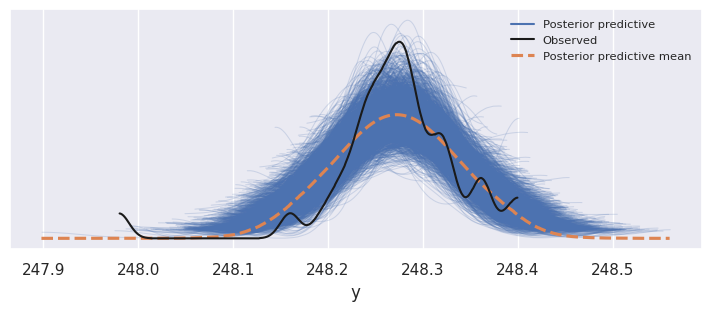

In [ ]:

#the posterior predictive is improved compared to the Gaussian model fitted on the original data.
# Anyway, this requires the heuristic work of deciding which observation is an outlier.
# Moreover, this shows how sensitive can be the estimation of the normal model to outliers (we only removed one datum out of 66)
with normal_model_no_outliers:
    ppc_t = pm.sample_posterior_predictive(trace_normal_no_outliers)

az.plot_ppc(ppc_t);